In [ ]:
//@version=5
indicator("Custom Candle with Matching Wicks (Adjustable)", overlay=true)




//━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
// FIRST CANDLE
//━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


// === Adjustable Session Settings ===
startH1 = input.int(20, "First Candle Start Hour", minval=0, maxval=23)
startM1 = input.int(0, "First Candle Start Minute", minval=0, maxval=59)
endH1   = input.int(22, "First Candle End Hour", minval=0, maxval=23)
endM1   = input.int(15, "First Candle End Minute", minval=0, maxval=59)


// === Detect session start and end ===
isStart1 = (hour == startH1 and minute == startM1)
isEnd1   = (hour == endH1 and minute == endM1)


// === Declare variables ===
var float o1 = na
var float h1 = na
var float l1 = na
var float c1 = na
var int x1_start = na
var int x1_end   = na


// === Start of session ===
if isStart1
    o1 := open
    h1 := high
    l1 := low
    x1_start := bar_index


// === During session ===
if (hour > startH1 or (hour == startH1 and minute > startM1)) and
   (hour < endH1 or (hour == endH1 and minute <= endM1))
    h1 := math.max(h1, high)
    l1 := math.min(l1, low)


// === End of session ===
if isEnd1
    c1 := close
    x1_end := bar_index


    candleColor1 = c1 >= o1 ? color.green : color.red
    bodyTop1     = math.max(o1, c1)
    bodyBottom1  = math.min(o1, c1)
    x1_mid       = math.floor((x1_start + x1_end) / 2)


    // Draw candle body
    box.new(left = x1_start, right = x1_end, top = bodyTop1, bottom = bodyBottom1, border_color = candleColor1, bgcolor = color.new(candleColor1, 70))


    // Draw wick top
    line.new(x1_mid, bodyTop1, x1_mid, h1, color=candleColor1)


    // Draw wick bottom
    line.new(x1_mid, bodyBottom1, x1_mid, l1, color=candleColor1)




//━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
// SECOND CANDLE
//━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


// === Adjustable Settings ===
startH2 = input.int(15, "Second Candle Start Hour", minval=0, maxval=23)
startM2 = input.int(0, "Second Candle Start Minute", minval=0, maxval=59)
endH2   = input.int(16, "Second Candle End Hour", minval=0, maxval=23)


// === Dynamic endMinute based on timeframe ===
var int endM2 = na
if timeframe.isminutes
    tfMins = timeframe.multiplier
    if tfMins == 1
        endM2 := 59
    else if tfMins == 3
        endM2 := 57
    else if tfMins == 5
        endM2 := 55
    else if tfMins == 15
        endM2 := 45
    else
        endM2 := 59  // Default fallback


// === Detect session start and end ===
isStart2 = (hour == startH2 and minute == startM2)
isEnd2   = (hour == endH2 and minute == endM2)


// === Declare session variables ===
var float o2 = na
var float h2 = na
var float l2 = na
var float c2 = na
var int x2_start = na
var int x2_end   = na


// === Start of session ===
if isStart2
    o2 := open
    h2 := high
    l2 := low
    x2_start := bar_index


// === During session ===
if (hour > startH2 or (hour == startH2 and minute > startM2)) and
   (hour < endH2 or (hour == endH2 and minute <= endM2))
    h2 := math.max(h2, high)
    l2 := math.min(l2, low)


// === End of session ===
if isEnd2
    c2 := close
    x2_end := bar_index


    candleColor2 = c2 >= o2 ? color.green : color.red
    bodyTop2     = math.max(o2, c2)
    bodyBottom2  = math.min(o2, c2)
    x2_mid       = math.floor((x2_start + x2_end) / 2)


    // Draw candle body
    box.new(left = x2_start, right = x2_end, top = bodyTop2, bottom = bodyBottom2, border_color = candleColor2, bgcolor = color.new(candleColor2, 70))


    // Draw wick top
    line.new(x2_mid, bodyTop2, x2_mid, h2, color=candleColor2)


    // Draw wick bottom
    line.new(x2_mid, bodyBottom2, x2_mid, l2, color=candleColor2)


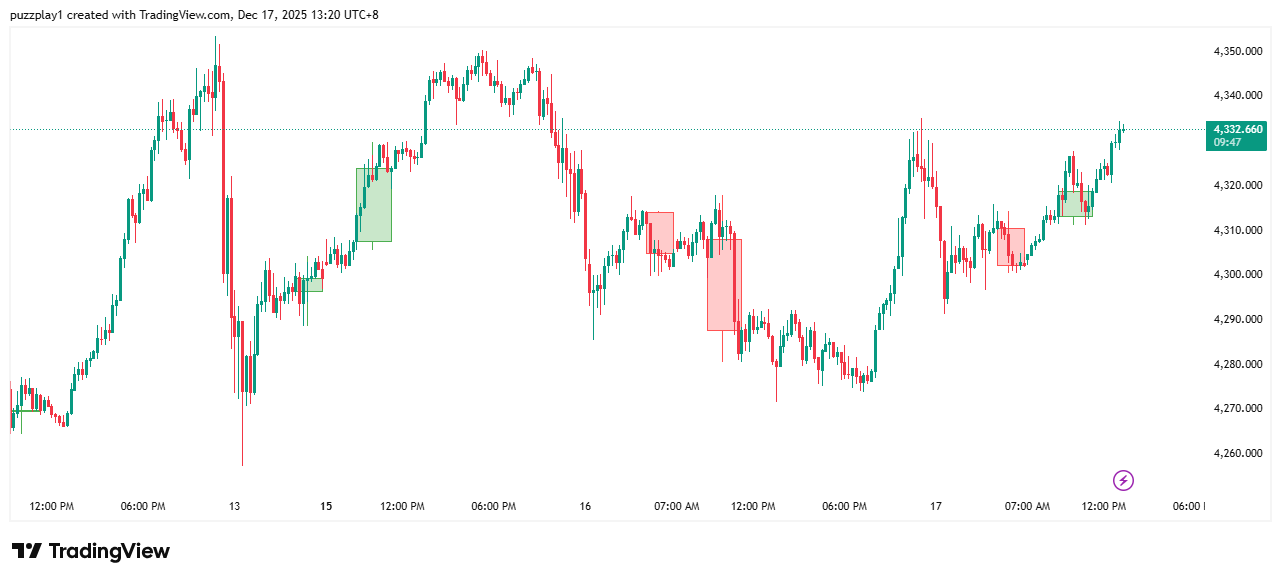